In [5]:
import re
import nltk
import string
from gensim.models import word2vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
paragraph = 'Now that COVID-19 vaccines have reached billions of people worldwide, the evidence is overwhelming that no matter which one you take, the vaccines offer life-saving protection against a disease that has killed millions. The pandemic is far from over, and they are our best bet of staying safe.'

In [7]:
#preprocessing the data 

paragraph = paragraph.translate(str.maketrans(' ',' ',string.punctuation))

text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

#print(text)

In [8]:
print(text)

now that covid vaccines have reached billions of people worldwide the evidence is overwhelming that no matter which one you take the vaccines offer lifesaving protection against a disease that has killed millions the pandemic is far from over and they are our best bet of staying safe


In [9]:
#preapring dataset
sentences = nltk.sent_tokenize(text)

In [10]:
# nltk.download('punkt')

In [11]:
print(sentences)

['now that covid vaccines have reached billions of people worldwide the evidence is overwhelming that no matter which one you take the vaccines offer lifesaving protection against a disease that has killed millions the pandemic is far from over and they are our best bet of staying safe']


In [12]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]
print(sent_word)

[['now', 'that', 'covid', 'vaccines', 'have', 'reached', 'billions', 'of', 'people', 'worldwide', 'the', 'evidence', 'is', 'overwhelming', 'that', 'no', 'matter', 'which', 'one', 'you', 'take', 'the', 'vaccines', 'offer', 'lifesaving', 'protection', 'against', 'a', 'disease', 'that', 'has', 'killed', 'millions', 'the', 'pandemic', 'is', 'far', 'from', 'over', 'and', 'they', 'are', 'our', 'best', 'bet', 'of', 'staying', 'safe']]


In [13]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
# nltk.download('stopwords')

In [15]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english') if word not in punc]
                  

In [16]:
#training model

model = word2vec.Word2Vec(sent_word, min_count=1)

words = model.wv.key_to_index 

In [17]:
words

{'vaccines': 0,
 'safe': 1,
 'take': 2,
 'reached': 3,
 'billions': 4,
 'people': 5,
 'worldwide': 6,
 'evidence': 7,
 'overwhelming': 8,
 'matter': 9,
 'one': 10,
 'offer': 11,
 'staying': 12,
 'lifesaving': 13,
 'protection': 14,
 'disease': 15,
 'killed': 16,
 'millions': 17,
 'pandemic': 18,
 'far': 19,
 'best': 20,
 'bet': 21,
 'covid': 22}

In [18]:
vector = model.wv['covid']  #test the word vector
print(vector)

[-2.3748637e-04  4.2191767e-03  2.1141458e-03  9.9958209e-03
  6.2947988e-04 -5.4644276e-03 -1.1796928e-03  2.0705319e-03
 -3.3730697e-03 -7.8467680e-03 -5.5992627e-03 -6.7500686e-03
  6.3533257e-03  3.9225556e-03  8.2155345e-03  6.5196683e-03
 -6.1278413e-03  2.7159499e-03  8.4721260e-03  1.5956569e-03
  3.0682278e-03  5.8126138e-03 -8.8393716e-03  9.1247465e-03
  6.8194820e-03  8.5104415e-03 -8.2262633e-03  6.1755395e-03
  6.6290712e-03 -1.3576436e-03 -6.2938668e-03  5.3266790e-03
 -6.8595791e-03 -5.3233551e-03  3.5116887e-03  8.0809714e-03
  8.6926939e-03 -4.4053150e-03 -9.1887712e-03  9.6076941e-03
  6.2903073e-03 -3.9663361e-03 -8.4597301e-03 -4.7183349e-03
 -3.9572287e-03 -3.2734512e-03  8.1909180e-04 -2.9716254e-04
 -3.1123781e-03 -5.9959888e-03  9.4205188e-03 -4.7255373e-03
 -7.2620986e-03  7.6847291e-03  2.5176955e-03  8.6263940e-03
 -4.4651176e-03 -6.8924045e-03  9.8490238e-04 -1.1729765e-03
 -9.3970653e-03 -1.6030740e-03  3.0505990e-03  6.5657808e-03
  6.8452405e-03  3.20827

In [19]:
# most similar words
similar = model.wv.most_similar('covid',topn=5)

similar

[('disease', 0.19613033533096313),
 ('safe', 0.18843619525432587),
 ('one', 0.09932279586791992),
 ('matter', 0.0777018591761589),
 ('bet', 0.06733350455760956)]

In [20]:
# same words similarity

model.wv.similarity(w1='covid',w2='vaccines')


-0.0507887

In [21]:
#filter on non similarity
model.wv.doesnt_match(["covid","vaccines","safe"])

'vaccines'

In [22]:
from sklearn.manifold import TSNE
vocab = ['covid','safe','staying','vaccines']
def tsne_plot(mod):
    labels=[]
    wordvecs=[]
    
    for word in vocab:
        wordvecs.append(model.wv[word])
        labels.append(word)
        
    tsne_mod = TSNE(perplexity=3, n_components=2,init='pca',random_state=42)
    coordinates=tsne_mod.fit_transform(wordvecs)
    
    x=[]
    y=[]
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
        
    plt.figure(figsize=(6,6))
        
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                    xy=(x[i],y[i]),
                    xytext=(2,2),
                    textcoords='offset points',ha='right', va='bottom')

            
            
            
    plt.show() 

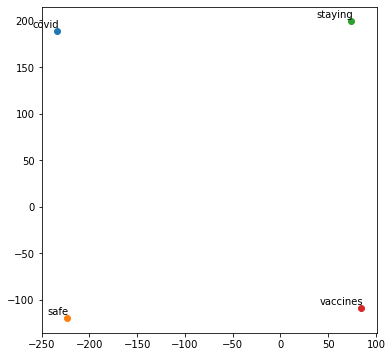

In [23]:
tsne_plot(model)
# plt.show()